Problem statement:-
The aim of the project is to predict fraudulent credit card transactions using machine learning models. This is crucial from the bank’s as well as customer’s perspective. The banks cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions.

The dataset contains transactions made over a period of two days in September 2013 by European credit cardholders. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. We need to take care of the data imbalance while building the model and come up with the best model by trying various algorithms.

Steps:-
The steps are broadly divided into below steps. The sub steps are also listed while we approach each of the steps.

1.Reading, understanding and visualising the data
2.Preparing the data for modelling
3.Building the model
4.Evaluate the model

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',500)

EXPLORATORY DATA ANALYSIS

Reading and understanding the data 

In [3]:
df = pd.read_csv('Data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


HANDLING MISSING VALUES

1. In columns: 

In [7]:
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null',ascending=False)
df_missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


We can see that there are no missing values in any of the columns. Hence, there is no problem with null values in the entire dataset. 

CHECKING THE DISTRIBUTION OF THE CLASSES 

In [8]:
classes = df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

In [9]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [10]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

We can see that there is only 0.17% frauds. We will take care of the class imbalance later. 

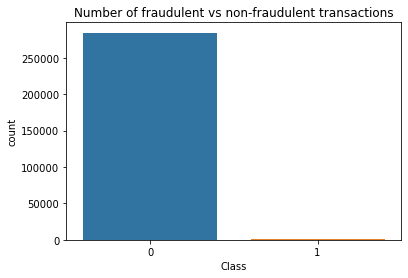

In [11]:
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transactions')
plt.show()

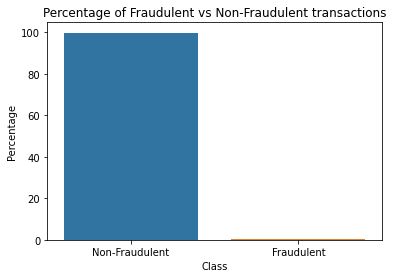

In [12]:
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of Fraudulent vs Non-Fraudulent transactions')
plt.show()

OUTLIERS TREATMENT 

We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data. 

Observing the distribution of classes with time: 

In [13]:
data_fraud = df[df['Class']==1]
data_non_fraud = df[df['Class']==0]

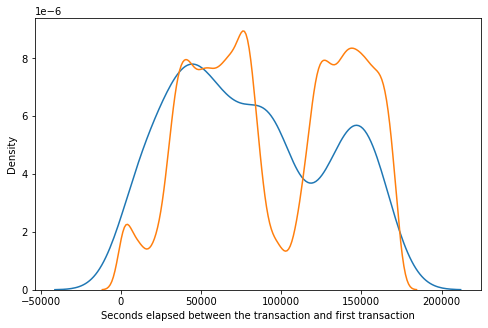

In [14]:
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'], label='fraudulent', hist=False)
ax = sns.distplot(data_non_fraud['Time'], label='non-fraudulent', hist=False)
ax.set(xlabel = 'Seconds elapsed between the transaction and first transaction')
plt.show()

ANALYSIS: 
We do not see any specific pattern for the fraudulent and non-fraudulent transactions with respect to time. Hence, we can drop the Time column. 

In [15]:
df.drop('Time', axis=1, inplace=True)

Observing the distribution of classes with amount: 

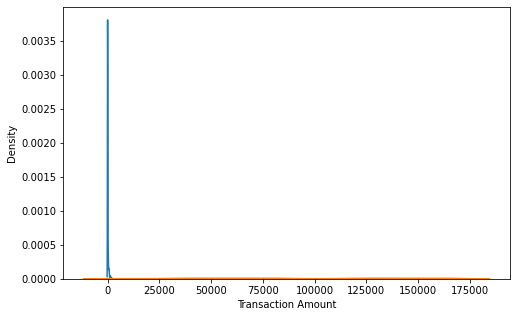

In [16]:
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'], label='Fraudulent', hist=False)
ax = sns.distplot(data_non_fraud['Time'], label='Non-Fraudulent', hist=False)
ax.set(xlabel='Transaction Amount')
plt.show()

ANALYSIS: 
We can see that the fraudulent transactions are mostly densed in the lower range of amount, whereas the non-fraudulent transactions are spread throughout low to high range of amount.

TRAIN-TEST SPLIT: 

In [17]:
from sklearn.model_selection import train_test_split 

In [18]:
X = df.drop(['Class'], axis=1)

In [19]:
y = df['Class']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=100)

FEATURE SCALING: 

We need to scale only the Amount column as all other columns are already scaled by the PCA transformation.

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [24]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,0.308648,0.875063,-0.009562,0.116038,0.086537,0.628337,-0.997868,0.482547,0.576077,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,0.519027,0.041275,-0.690783,0.647121,0.526333,-1.098558,0.511739,0.243984,3.349611,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,1.106534,1.026421,-0.474229,0.641488,-0.430684,-0.631257,0.634633,-0.718062,-0.039929,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,-0.784316,0.673626,1.428269,0.043937,-0.309507,-1.805728,-0.012118,0.377096,-0.658353,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,-0.497634,-0.445482,0.324575,0.125543,0.266588,0.802640,0.225312,-1.865494,0.621879,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


Scaling the test set: 
We don't fit scaler on the test set. We only transform the test set. 

In [25]:
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,-0.850459,0.397845,-0.259849,-0.277065,-0.766810,-0.200946,-0.338122,0.006032,0.477431,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,1.126976,-2.418093,1.250341,-0.056209,-0.736695,0.014783,1.890249,0.333755,-0.450398,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,1.145725,0.907573,-1.095634,-0.055080,-0.621880,-0.191066,0.311988,-0.478635,0.231159,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,-1.705327,-0.127579,-0.207945,0.307878,0.213491,0.163032,-0.587029,-0.561292,0.472667,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,-0.288169,-1.007647,0.470316,-2.771902,0.221958,0.354333,2.603189,1.092576,0.668084,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


CHECKING THE SKEWNESS: 

In [26]:
cols = X_train.columns 
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

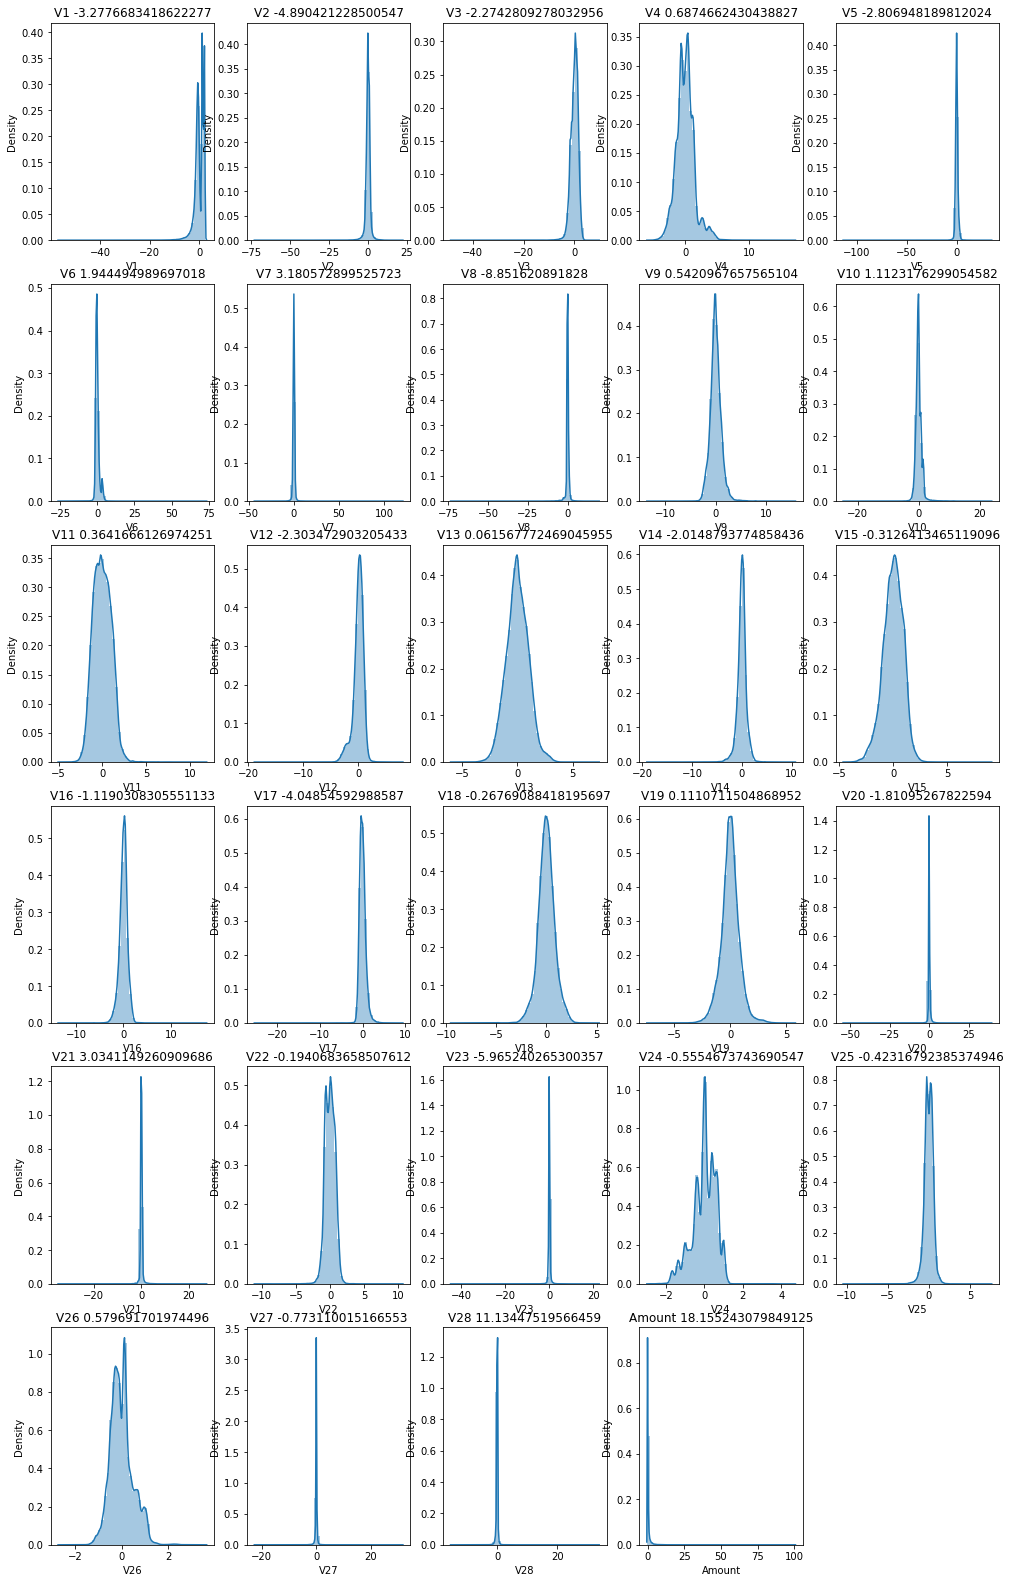

In [27]:
k = 0 
plt.figure(figsize=(17,28))
for col in cols: 
    k=k+1
    plt.subplot(6,5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

We see that there are many variables, which are heavily skewed. We will mitigate the skewedness only for those variables for bringing them into normal distribution. 

Mitigate Skewedness with PowerTransformer: 

In [28]:
from sklearn.preprocessing import PowerTransformer 
pt = PowerTransformer(method='yeo-johnson', standardize = True, copy=False)

X_train[cols] = pt.fit_transform(X_train)

In [29]:
X_test[cols] = pt.transform(X_test)

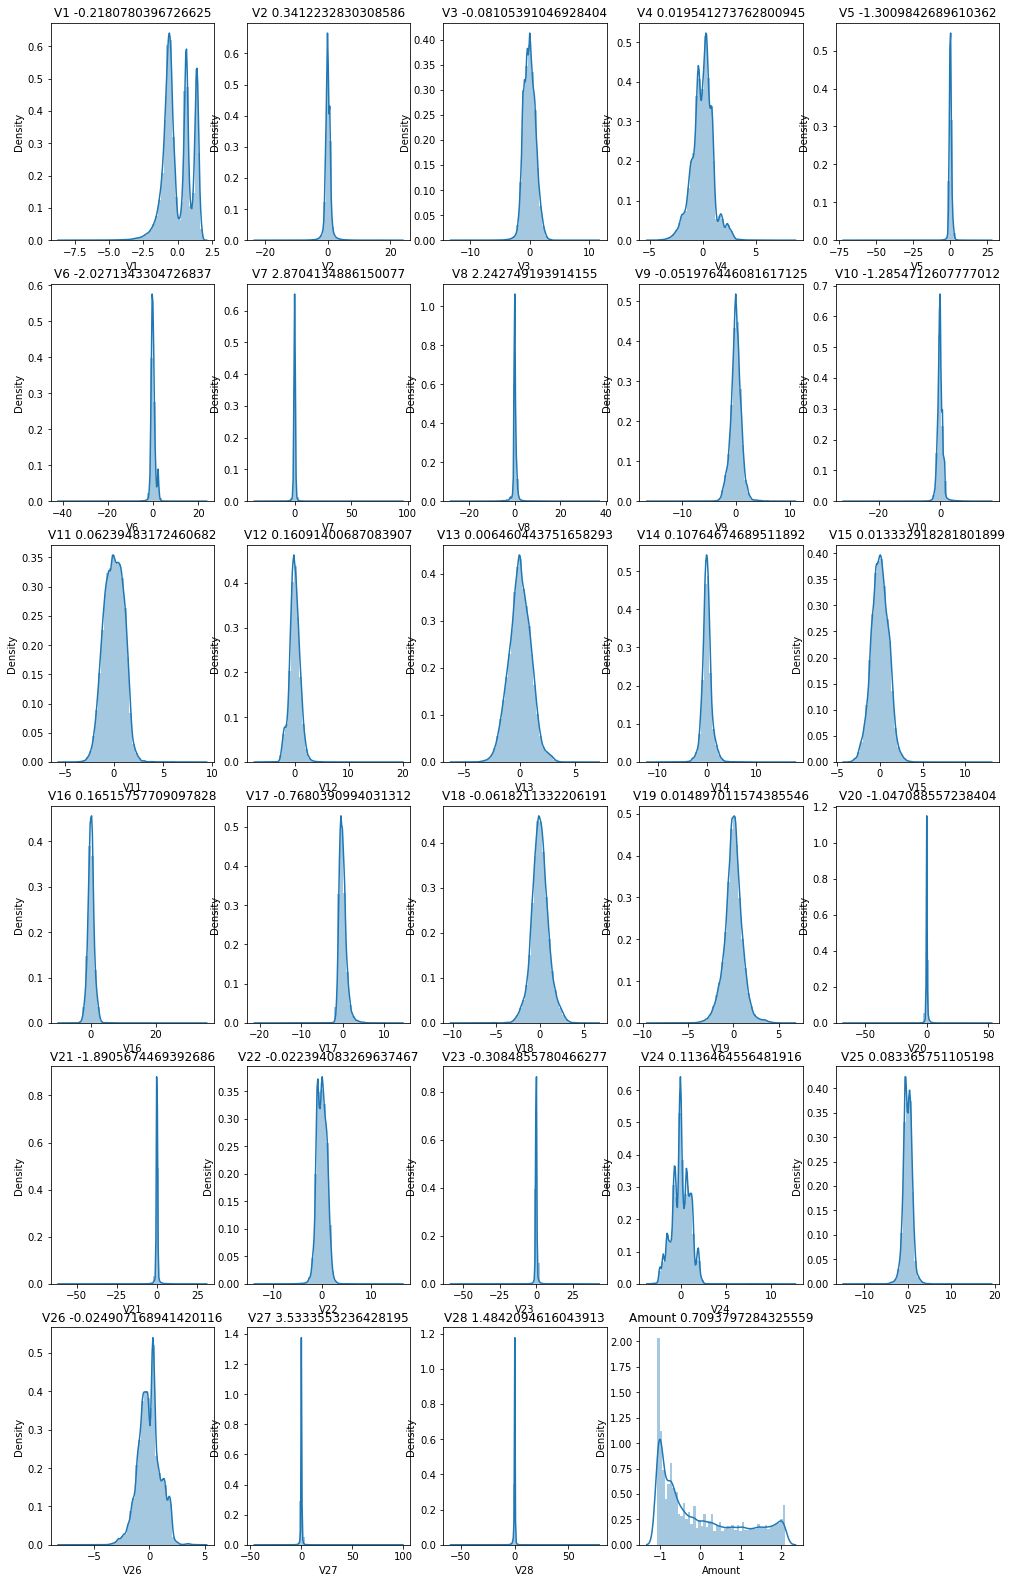

In [30]:
k = 0
plt.figure(figsize=(17,28))
for col in cols: 
    k= k+1 
    plt.subplot(6,5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

We can see that all the variables are normally distributed after the transformation. 

MODEL BUILDING ON IMBALANCED DATA 

Metric selection for heavily imbalanced data

As we have seen that the data is heavily imbalanced, where only 0.17% transctions are fraudulent, we should not consider Accuracy as a good measure for evaluating the model. Because in the case of all the datapoints return a particular class(1/0) irrespective of any prediction, still the model will result more than 99% Accuracy.

Hence, we have to measure the ROC-AUC score for fair evaluation of the model. The ROC curve is used to understand the strength of the model by evaluating the performance of the model at all the classification thresholds. The default threshold of 0.5 is not always the ideal threshold to find the best classification label of the test point. Because the ROC curve is measured at all thresholds, the best threshold would be one at which the TPR is high and FPR is low, i.e., misclassifications are low. After determining the optimal threshold, we can calculate the F1 score of the classifier to measure the precision and recall at the selected threshold.

Why SVM was not tried for model building and Random Forest was not tried for few cases?

In the dataset we have 284807 datapoints and in the case of Oversampling we would have even more number of datapoints. SVM is not very efficient with large number of datapoints beacuse it takes lot of computational power and resources to make the transformation. When we perform the cross validation with K-Fold for hyperparameter tuning, it takes lot of computational resources and it is very time consuming. Hence, because of the unavailablity of the required resources and time SVM was not tried.

For the same reason Random forest was also not tried for model building in few of the hyperparameter tuning for oversampling technique.

Why KNN was not used for model building?

KNN is not memory efficient. It becomes very slow as the number of datapoints increases as the model needs to store all the data points. It is computationally heavy because for a single datapoint the algorithm has to calculate the distance of all the datapoints and find the nearest neighbors.

LOGISTIC REGRESSION: 

In [31]:
from sklearn.linear_model import LogisticRegression 

In [32]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score 
from sklearn.metrics import classification_report 

Tuning hyperparameter C: 
C is the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization. 

In [33]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV

In [34]:
folds = KFold(n_splits =5, shuffle = True, random_state=4)

params = {"C": [0.01,0.1,1,10,100,1000]}

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring = 'roc_auc',
                        cv = folds, 
                        verbose = 1,
                        return_train_score = True)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [35]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.638814,0.028116,0.015042,0.000893,0.01,{'C': 0.01},0.986856,0.987234,0.968390,0.982373,0.993743,0.983719,0.008479,1,0.984043,0.984587,0.988474,0.985596,0.983075,0.985155,0.001849
1,0.802204,0.031563,0.014036,0.000632,0.1,{'C': 0.1},0.986104,0.987144,0.960929,0.980620,0.992284,0.981416,0.010893,2,0.982402,0.983785,0.987917,0.984018,0.981187,0.983862,0.002270
2,0.827210,0.045694,0.014627,0.000484,1,{'C': 1},0.985834,0.986806,0.958452,0.979781,0.991548,0.980484,0.011635,3,0.981722,0.983322,0.987492,0.983305,0.980489,0.983266,0.002365
3,0.879550,0.042370,0.014036,0.000878,10,{'C': 10},0.985798,0.986754,0.958181,0.979674,0.991467,0.980375,0.011715,4,0.981632,0.983262,0.987435,0.983216,0.980404,0.983190,0.002375
4,0.865304,0.062631,0.014048,0.000884,100,{'C': 100},0.985793,0.986748,0.958155,0.979666,0.991461,0.980365,0.011722,5,0.981625,0.983256,0.987429,0.983207,0.980396,0.983182,0.002376
5,0.855614,0.076954,0.013650,0.000490,1000,{'C': 1000},0.985793,0.986747,0.958153,0.979663,0.991461,0.980363,0.011723,6,0.981623,0.983256,0.987428,0.983206,0.980395,0.983182,0.002376


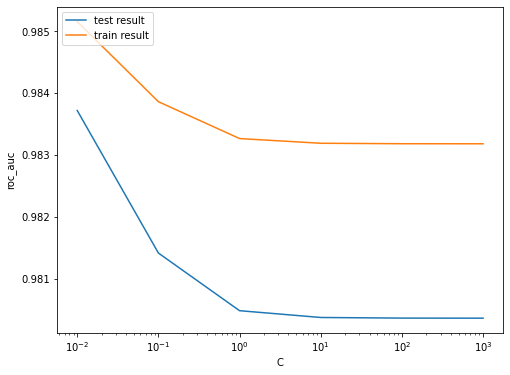

In [36]:
plt.figure(figsize=(8,6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc = 'upper left')
plt.xscale('log')

In [37]:
best_score = model_cv.best_score_ 
best_C = model_cv.best_params_['C']

print("The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

The highest test roc_auc is 0.9837192853831933 at C = 0.01


Logistic regression with Optimal C: 

In [38]:
logistic_imb = LogisticRegression(C=0.01)

In [39]:
logistic_imb_model = logistic_imb.fit(X_train, y_train)

Prediction on the train set:

In [40]:
y_train_pred = logistic_imb_model.predict(X_train)

In [41]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227427     22]
 [   135    261]]


In [42]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [43]:
print("Accuracy :", metrics.accuracy_score(y_train, y_train_pred))

print("Sensitivity :", TP/float(TP+FN))

print("Specificity :", TN/float(TN+FP))

print("F1-Score :", f1_score(y_train, y_train_pred))

Accuracy : 0.9993109350655051
Sensitivity : 0.6590909090909091
Specificity : 0.9999032750198946
F1-Score : 0.7687776141384388


In [44]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.66      0.77       396

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845



ROC on the train set: 

In [45]:
def draw_roc(actual, probs): 
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1- True Negatuve Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None 

In [46]:
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]

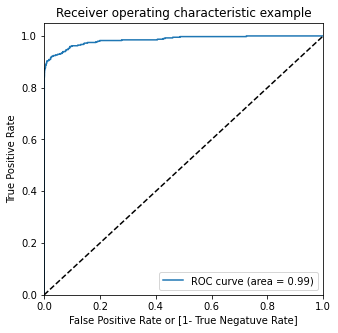

In [47]:
draw_roc(y_train, y_train_pred_proba)

We achieved a very good ROC of 0.99 on the train set. 

Prediction on the test set: 

In [48]:
y_test_pred = logistic_imb_model.predict(X_test)

In [49]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56850    16]
 [   42    54]]


In [50]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [51]:
print("Accuracy :", metrics.accuracy_score(y_test, y_test_pred))

print("Sensitivity :", TP/float(TP+FN))

print("Specificity :", TN/float(TN+FP))

print("F1-Score :", f1_score(y_test, y_test_pred))

Accuracy : 0.9989817773252344
Sensitivity : 0.5625
Specificity : 0.9997186367952731
F1-Score : 0.6506024096385543


In [52]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



ROC on the test set: 

In [53]:
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

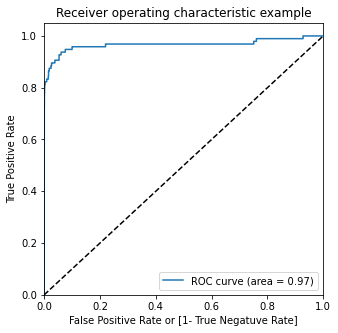

In [54]:
draw_roc(y_test, y_test_pred_proba)

We can see that we have very good ROC on the test set of 0.97 which is almost close to 1

XGBoost:

In [55]:
from xgboost import XGBClassifier

Tuning the hyperparameters: 

In [56]:
folds = 3 

param_grid = {'learning_rate': [0.2, 0.6], 
              'subsample' : [0.3,0.6,0.9]}

xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring = 'roc_auc', 
                        cv = folds, 
                        verbose = 1, 
                        return_train_score = True)

model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[15:19:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:09]

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [57]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,10.696416,0.020896,0.072192,0.009824,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.979854,0.971801,0.981423,0.977693,0.004215,1,0.999894,0.999940,0.999847,0.999894,0.000038
1,15.087236,0.143100,0.067178,0.012867,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.977143,0.972788,0.977688,0.975873,0.002193,3,0.999966,0.999987,0.999966,0.999973,0.000010
2,18.159588,0.123248,0.068515,0.007383,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.978125,0.970882,0.980136,0.976381,0.003974,2,0.999950,0.999983,0.999911,0.999948,0.000029
3,10.402642,0.053852,0.062165,0.002951,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.961154,0.974479,0.973310,0.969648,0.006025,6,0.999999,1.000000,0.999995,0.999998,0.000002
4,14.313843,0.112582,0.070187,0.002456,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.970611,0.965528,0.983906,0.973348,0.007748,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,17.266215,0.163489,0.068516,0.009767,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.972799,0.973557,0.974113,0.973490,0.000539,4,1.000000,1.000000,1.000000,1.000000,0.000000


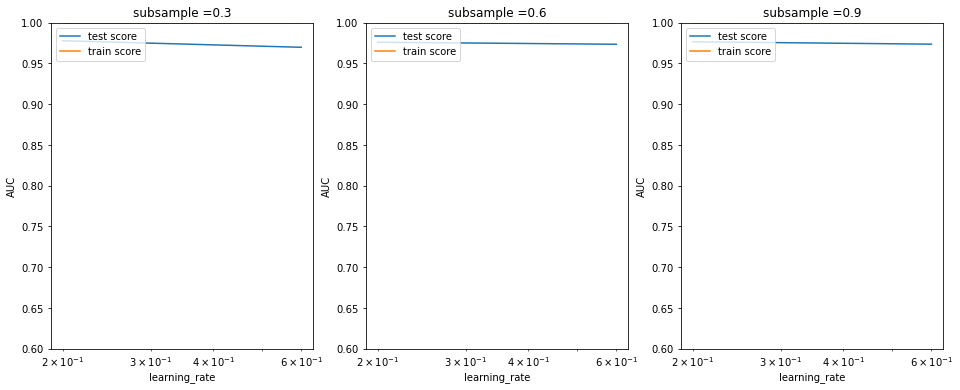

In [58]:
plt.figure(figsize=(16,6))

param_grid = {'learning_rate' : [0.2,0.6], 
              'subsample' :[0.3,0.6,0.9]}

for n, subsample in enumerate(param_grid['subsample']): 
    
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]
    
    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample ={0}".format(subsample))
    plt.ylim([0.60,1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')
    

Model with optimal hyperparameters: 
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate: 0.2 and subsample:0.3

In [59]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

In [60]:
params = {'learning rate': 0.2, 
          'max_depth' : 2, 
          'n_estimators' :200, 
          'subsample' : 0.9, 
          'objective' : 'binary:logistic'}

xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

[15:24:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:24:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              params={'learning rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Prediciton on the train set

In [61]:
y_train_pred = xgb_imb_model.predict(X_train)

In [62]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227449      0]
 [     0    396]]


In [63]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [64]:
print("Accuracy: ",metrics.accuracy_score(y_train,y_train_pred))

print("Sensitivity: ",TP/float(TP+FN))

print("Specificity: ",TN/float(TN+FP))

print("F1-Score: ",f1_score(y_train,y_train_pred))

Accuracy:  1.0
Sensitivity:  1.0
Specificity:  1.0
F1-Score:  1.0


In [65]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [66]:
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [67]:
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

1.0

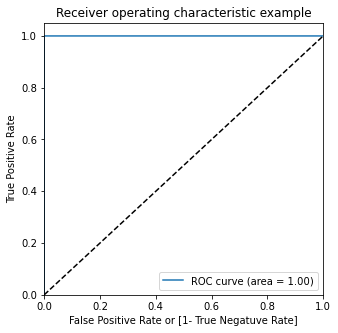

In [68]:
draw_roc(y_train, y_train_pred_proba_imb_xgb)

Prediction on the test set

In [69]:
y_test_pred = xgb_imb_model.predict(X_test)

In [70]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56859     7]
 [   24    72]]


In [71]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [72]:
print("Accuracy :", metrics.accuracy_score(y_test,y_test_pred))

print("Sensitivity: ", TP/float(TP+FN))

print("Specificity: ", TN/float(TN+FP))

print("F1-Score: ", f1_score(y_test, y_test_pred))

Accuracy : 0.9994557775359011
Sensitivity:  0.75
Specificity:  0.999876903597932
F1-Score:  0.8228571428571428


In [73]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.91      0.75      0.82        96

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [74]:
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [75]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9785370798602564

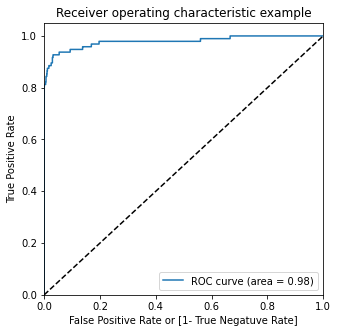

In [76]:
draw_roc(y_test,y_test_pred_proba)

DECISION TREE: 

In [77]:
from sklearn.tree import DecisionTreeClassifier 

In [78]:
param_grid = { 
    'max_depth': range(5,15,5),
    'min_samples_leaf': range(50,150,50),
    'min_samples_split': range(50,150,50)}

dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                          param_grid = param_grid, 
                          scoring = 'roc_auc',
                          cv = 3, 
                          verbose = 1)

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [79]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.891372,0.128324,0.023730,0.000473,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933183,0.923867,0.930129,0.004428,5
1,2.826849,0.018784,0.023726,0.000470,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933180,0.923865,0.930128,0.004429,6
2,2.785408,0.009447,0.023397,0.000475,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933297,0.936720,0.944598,0.938205,0.004732,1
3,2.786402,0.019648,0.023741,0.000463,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933282,0.936720,0.944598,0.938200,0.004737,2
4,5.753622,0.252626,0.026088,0.001391,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.917504,0.916451,0.945534,0.926496,0.013468,7
5,5.896334,0.089165,0.027072,0.002167,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.932370,0.923900,0.938021,0.931430,0.005803,4
6,5.461492,0.031122,0.026073,0.000818,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933423,0.919703,0.944112,0.932413,0.009990,3
7,5.462850,0.025905,0.025401,0.001251,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933456,0.919682,0.921757,0.924965,0.006064,8


In [80]:
print("Best roc_auc: ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:  0.9382050164508641
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


In [81]:
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                     random_state = 100, 
                                     max_depth = 5, 
                                     min_samples_leaf = 100, 
                                     min_samples_split = 100) 
dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

Prediction on the train set: 

In [82]:
y_train_pred = dt_imb_model.predict(X_train)

In [83]:
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227449      0]
 [     0    396]]


In [84]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [85]:
print("Accuracy: ", metrics.accuracy_score(y_train,y_train_pred))

print("Sensitivity: ", TP/float(TP+FN))

print("Specificity: ", TN/float(TN+FP))

print("F1-Score: ", f1_score(y_train, y_train_pred))

Accuracy:  0.9991704887094297
Sensitivity:  1.0
Specificity:  1.0
F1-Score:  0.7490039840637449


In [86]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.79      0.71      0.75       396

    accuracy                           1.00    227845
   macro avg       0.89      0.86      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [87]:
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [88]:
auc = metrics.roc_auc_score(y_train,y_train_pred_proba)
auc

0.9534547393930157

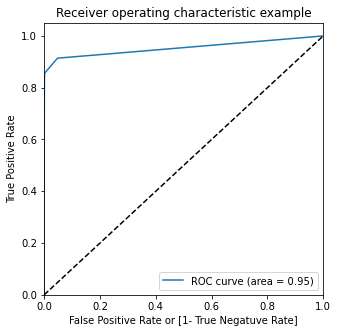

In [89]:
draw_roc(y_train, y_train_pred_proba)

Predictions on the test set: 

In [90]:
y_test_pred = dt_imb_model.predict(X_test)

In [91]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56836    30]
 [   40    56]]


In [92]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [93]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_test_pred))

print("Sensitivity: ", TP/float(TP+FN))

print("Specificity: ", TN/float(TN+FP))

print("F1-Score: ", f1_score(y_train, y_train_pred))

Accuracy:  0.9987711105649381
Sensitivity:  0.5833333333333334
Specificity:  0.9994724439911371
F1-Score:  0.7490039840637449


In [94]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [95]:
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [96]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.92174979703748

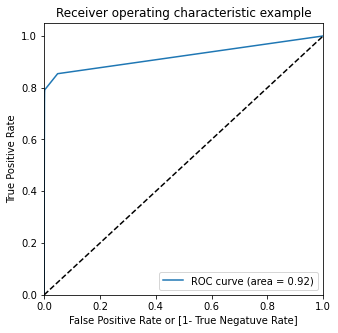

In [97]:
draw_roc(y_test, y_test_pred_proba)

RANDOM FOREST: 

In [98]:
from sklearn.ensemble import RandomForestClassifier 

In [99]:
param_grid = {
    'max_depth' : range(5,10,5),
    'min_samples_leaf' : range(50,150,50),
    'min_samples_split': range(50,150,50),
    'n_estimators' : [100,200,300],
    'max_features' : [10,20]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2, 
                           n_jobs = -1, 
                           verbose = 1, 
                           return_train_score = True)

grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [100]:
print('We can get accuracy of', grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9992933792131935 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


In [101]:
rfc_imb_model = RandomForestClassifier(bootstrap = True,
                                      max_depth = 5,
                                      min_samples_leaf = 50, 
                                      min_samples_split = 50, 
                                      max_features = 10, 
                                      n_estimators = 100)

In [102]:
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

Prediction on the train set:

In [103]:
y_train_pred = rfc_imb_model.predict(X_train)

In [104]:
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227449      0]
 [     0    396]]


In [105]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [106]:
print("Accuracy: ",metrics.accuracy_score(y_train, y_train_pred))

print("Sensitivity: ", TP/float(TP+FN))

print("Specificity: ", TN/float(TN+FP))

print("F1-Score: ", f1_score(y_train, y_train_pred))

Accuracy:  0.9993723803462881
Sensitivity:  1.0
Specificity:  1.0
F1-Score:  0.8022130013831259


In [107]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.89      0.73      0.80       396

    accuracy                           1.00    227845
   macro avg       0.94      0.87      0.90    227845
weighted avg       1.00      1.00      1.00    227845



In [108]:
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]

In [109]:
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9809886452067778

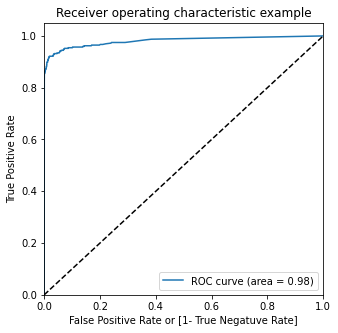

In [110]:
draw_roc(y_train, y_train_pred_proba)

Prediction on the test set: 

In [111]:
y_test_pred = rfc_imb_model.predict(X_test)

In [113]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56846    20]
 [   36    60]]


In [114]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [115]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_test_pred))

print("Sensitivity: ", TP/float(TP+FN))

print("Specificity: ", TN/float(TN+FP))

print("F1-Score: ", f1_score(y_train, y_train_pred))

Accuracy:  0.9990168884519505
Sensitivity:  0.625
Specificity:  0.9996482959940913
F1-Score:  0.8022130013831259


In [116]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.75      0.62      0.68        96

    accuracy                           1.00     56962
   macro avg       0.87      0.81      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [118]:
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

In [119]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9621917277752378

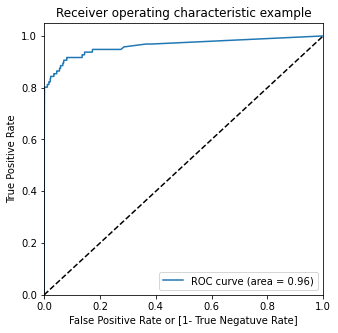

In [120]:
draw_roc(y_test, y_test_pred_proba)

Choosing best model on the imbalanced data
We can see that among all the models we tried (Logistic, XGBoost, Decision Tree, and Random Forest), almost all of them have performed well. More specifically Logistic regression and XGBoost performed best in terms of ROC-AUC score.

But as we have to choose one of them, we can go for the best as XGBoost, which gives us ROC score of 1.0 on the train data and 0.98 on the test data.

Keep in mind that XGBoost requires more resource utilization than Logistic model. Hence building XGBoost model is more costlier than the Logistic model. But XGBoost having ROC score 0.98, which is 0.01 more than the Logistic model. The 0.01 increase of score may convert into huge amount of saving for the bank.

Print the important features of the best model to understand the dataset
-This will not give much explanation on the already transformed dataset
-But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


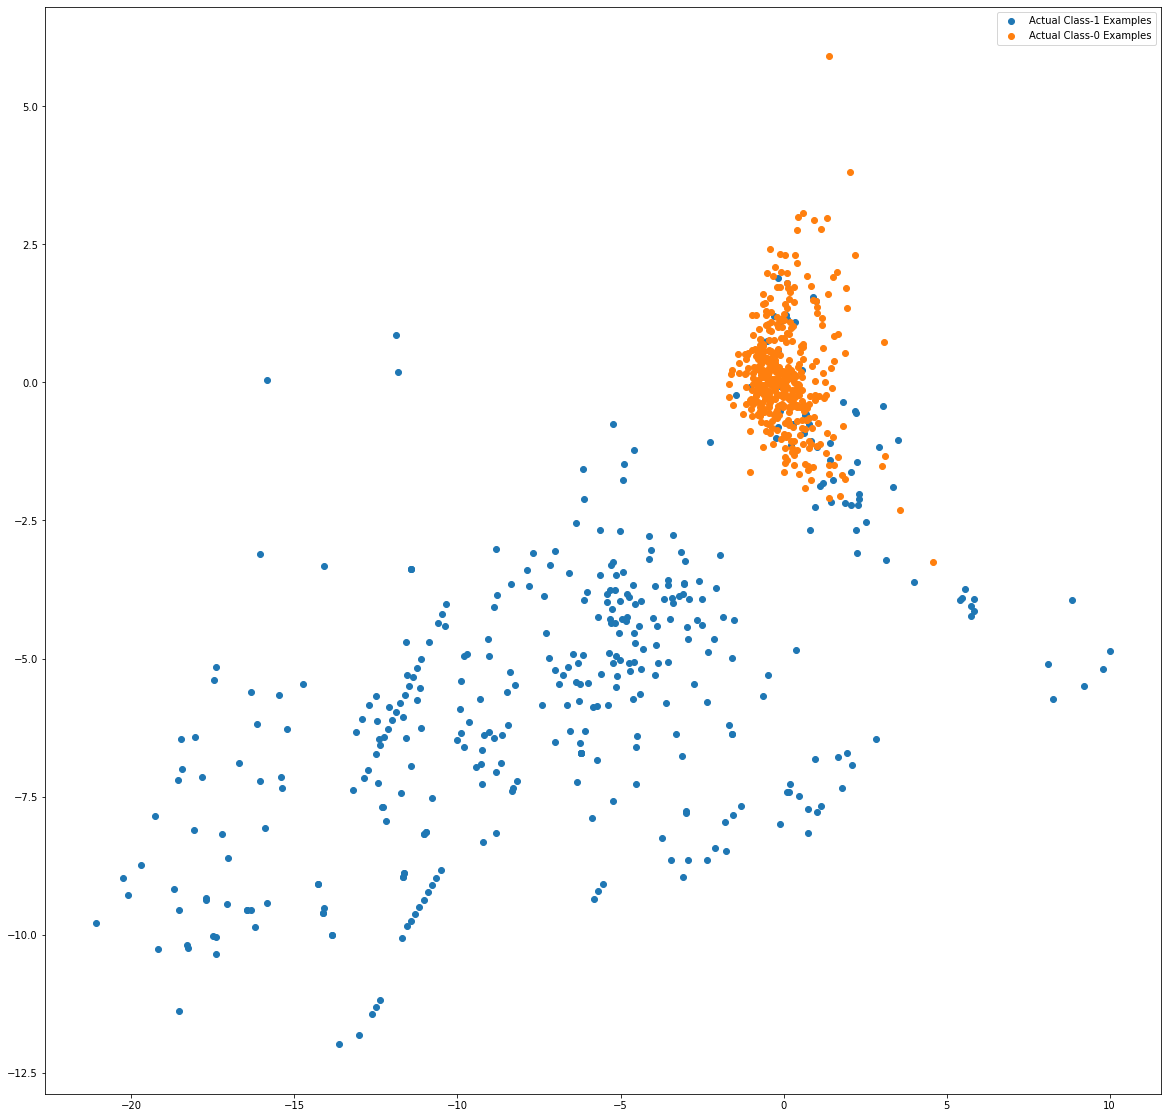

In [122]:
var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)
# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

Print the FPR, TPR & select the best threshold from the roc curve for the best model 

In [123]:
print('Train auc=', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=", threshold)

Train auc= 1.0
Threshold= 0.8474788


We can see that the threshold is 0.85, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

UNDERSAMPLING: 

In [125]:
from imblearn.under_sampling import RandomUnderSampler 
from collections import Counter 

In [126]:
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [127]:
print('Before sampling class distribution: ', Counter(y_train))

print('New class distribution: ', Counter(y_train_rus))

Before sampling class distribution:  Counter({0: 227449, 1: 396})
New class distribution:  Counter({0: 396, 1: 396})


MODEL BUILDING ON BALANCED DATA WITH UNDERSAMPLING: 

Logistic Regression: 

In [128]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

params = {'C': [0.01,0.1,1,10,100,1000]}

model_cv = GridSearchCV(estimator = LogisticRegression(), 
                        param_grid = params, 
                        scoring = 'roc_auc', 
                        cv = folds, 
                        verbose = 1, 
                       return_train_score = True)

model_cv.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [129]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011525,0.000903,0.002505,3.141772e-04,0.01,{'C': 0.01},0.985692,0.994935,0.980609,0.974988,0.982111,0.983667,0.006606,1,0.988476,0.987671,0.990447,0.990685,0.989259,0.989308,0.001146
1,0.013111,0.001134,0.002605,1.961470e-04,0.1,{'C': 0.1},0.985374,0.994619,0.979006,0.971300,0.982434,0.982546,0.007652,2,0.989794,0.989518,0.992716,0.992228,0.990921,0.991035,0.001273
2,0.016833,0.001063,0.002407,3.756553e-04,1,{'C': 1},0.987758,0.994460,0.970032,0.970499,0.982272,0.981004,0.009582,3,0.991492,0.990346,0.994009,0.993810,0.991747,0.992281,0.001412
3,0.022418,0.003252,0.002612,4.900248e-04,10,{'C': 10},0.985533,0.994302,0.966827,0.967452,0.983723,0.979567,0.010762,4,0.992411,0.990506,0.993930,0.994268,0.991986,0.992620,0.001367
4,0.025971,0.005899,0.002506,5.761645e-07,100,{'C': 100},0.983307,0.994302,0.966667,0.967773,0.983239,0.979058,0.010477,5,0.992581,0.990536,0.993860,0.994646,0.991817,0.992688,0.001457
5,0.031497,0.006860,0.002811,6.003406e-04,1000,{'C': 1000},0.981876,0.994302,0.966827,0.967613,0.983078,0.978739,0.010359,6,0.992630,0.990526,0.993850,0.994666,0.991817,0.992698,0.001463


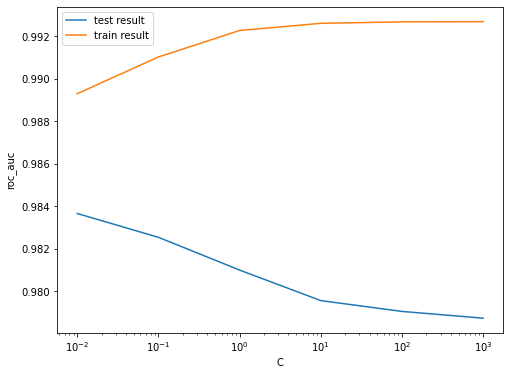

In [130]:
plt.figure(figsize=(8,6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result','train result'], loc='upper left')
plt.xscale('log')

In [131]:
best_score = model_cv.best_score_ 
best_C = model_cv.best_params_['C']

print("The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

The highest test roc_auc is 0.9836669659929351 at C = 0.01


Logistic regression with optimal C:

In [132]:
logistic_bal_rus = LogisticRegression(C=0.1)

In [133]:
logistic_bal_rus_model = logistic_bal_rus.fit(X_train_rus, y_train_rus)

Prediction on the train set: 

In [134]:
y_train_pred = logistic_bal_rus_model.predict(X_train_rus)

In [135]:
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[391   5]
 [ 30 366]]


In [136]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [137]:
print("Accuracy: ",metrics.accuracy_score(y_train_rus, y_train_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

print("F1-Score:", f1_score(y_train_rus, y_train_pred))

Accuracy:  0.9558080808080808
Sensitivity:  0.9242424242424242
Specificity:  0.9873737373737373
F1-Score: 0.9543676662320729


In [138]:
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       396
           1       0.99      0.92      0.95       396

    accuracy                           0.96       792
   macro avg       0.96      0.96      0.96       792
weighted avg       0.96      0.96      0.96       792



In [140]:
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [141]:
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.990421895724926

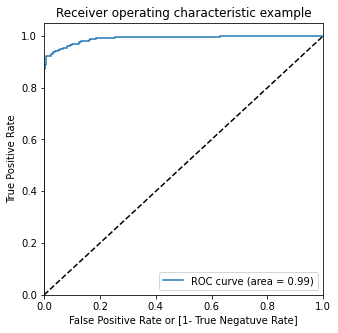

In [142]:
draw_roc(y_train_rus, y_train_pred_proba)

Prediction on the test set: 

In [143]:
y_test_pred = logistic_bal_rus_model.predict(X_test)

In [144]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55473  1393]
 [   11    85]]


In [145]:
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [146]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_test_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

Accuracy:  0.9753519890453285
Sensitivity:  0.8854166666666666
Specificity:  0.9755038159884641


In [147]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [148]:
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]

In [149]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9633758895180483

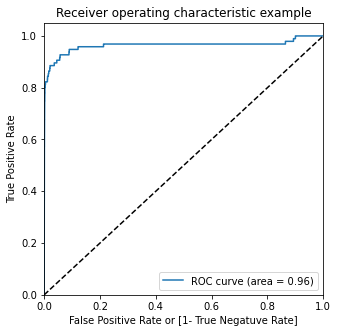

In [150]:
draw_roc(y_test, y_test_pred_proba)

XGBoost: 

In [151]:
folds = 3

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train_rus, y_train_rus)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[17:11:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:11:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:11:57]

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [152]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.143715,0.010903,0.005849,0.000236,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.979224,0.970099,0.976412,0.975245,0.003816,5,0.999914,0.999943,1.0,0.999952,0.000036
1,0.149397,0.007172,0.006350,0.000852,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.978708,0.975781,0.980601,0.978363,0.001983,3,1.000000,1.000000,1.0,1.000000,0.000000
2,0.160093,0.005587,0.005515,0.000407,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.985193,0.970386,0.983184,0.979588,0.006558,1,1.000000,1.000000,1.0,1.000000,0.000000
3,0.122492,0.007684,0.005849,0.000236,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.971132,0.964187,0.978822,0.971380,0.005977,6,1.000000,1.000000,1.0,1.000000,0.000000
4,0.130848,0.004502,0.005682,0.000237,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.980544,0.967860,0.982782,0.977062,0.006571,4,1.000000,1.000000,1.0,1.000000,0.000000
5,0.129845,0.006030,0.005682,0.000625,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.983356,0.972280,0.980888,0.978841,0.004748,2,1.000000,1.000000,1.0,1.000000,0.000000


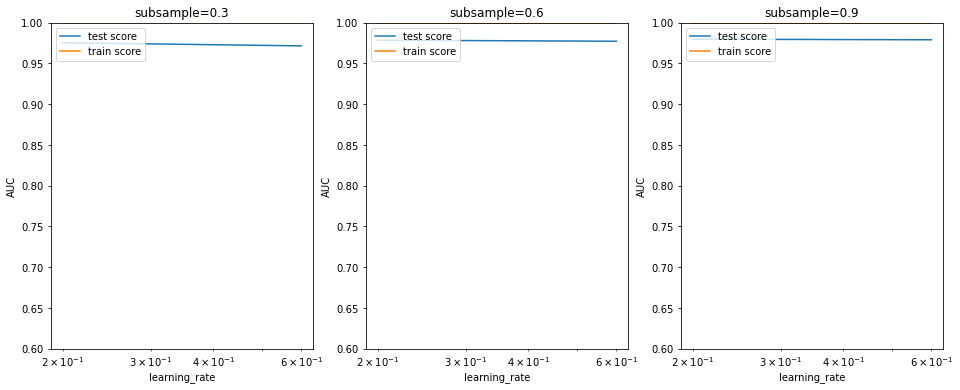

In [153]:
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):

    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [154]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [155]:
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

xgb_bal_rus_model = XGBClassifier(params = params)
xgb_bal_rus_model.fit(X_train_rus, y_train_rus)

[17:14:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:14:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Prediction on the train set:

In [156]:
y_train_pred = xgb_bal_rus_model.predict(X_train_rus)

In [157]:
confusion = metrics.confusion_matrix(y_train_rus, y_train_rus)
print(confusion)

[[396   0]
 [  0 396]]


In [158]:
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [159]:
print("Accuracy: ",metrics.accuracy_score(y_train_rus, y_train_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

Accuracy:  1.0
Sensitivity:  1.0
Specificity:  1.0


In [160]:
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       396
           1       1.00      1.00      1.00       396

    accuracy                           1.00       792
   macro avg       1.00      1.00      1.00       792
weighted avg       1.00      1.00      1.00       792



In [161]:
y_train_pred_proba = xgb_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [162]:
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

1.0

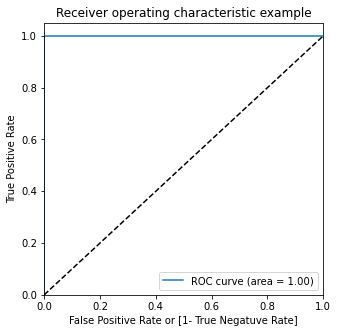

In [163]:
draw_roc(y_train_rus, y_train_pred_proba)

Prediction on the test set: 

In [164]:
y_test_pred = xgb_bal_rus_model.predict(X_test)

In [165]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[54911  1955]
 [   11    85]]


In [166]:
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1]
FN = confusion[1,0]

In [167]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_test_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

Accuracy:  0.9654857624381167
Sensitivity:  0.8854166666666666
Specificity:  0.9656209334224317


In [168]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56866
           1       0.04      0.89      0.08        96

    accuracy                           0.97     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.97      0.98     56962



In [169]:
y_test_pred_proba = xgb_bal_rus_model.predict_proba(X_test)[:,1]

In [170]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9797638307600324

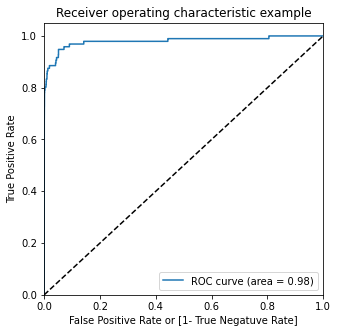

In [171]:
draw_roc(y_test, y_test_pred_proba)

DECISION TREE: 

In [172]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

grid_search.fit(X_train_rus,y_train_rus)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [173]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006516,0.001081,0.003008,4.092896e-04,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.942952,0.958219,0.977990,0.959720,0.014344,2
1,0.006030,0.000699,0.002669,2.305152e-04,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.941403,0.953484,0.975006,0.956631,0.013898,4
2,0.005347,0.000945,0.003175,9.456067e-04,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.943612,0.956899,0.964733,0.955081,0.008718,7
3,0.006352,0.001028,0.002672,2.370419e-04,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.941403,0.957587,0.964474,0.954488,0.009671,8
4,0.006016,0.000819,0.002506,4.899036e-07,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.949954,0.956985,0.972825,0.959921,0.009565,1
5,0.005849,0.000852,0.003348,6.293857e-04,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.941403,0.958104,0.976326,0.958611,0.014262,3
6,0.004682,0.000240,0.002170,2.324259e-04,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.944645,0.957185,0.964790,0.955540,0.008306,5
7,0.005181,0.001031,0.002674,2.369216e-04,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.943957,0.957013,0.964704,0.955225,0.008564,6


In [174]:
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9599211815120906
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [175]:
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_rus_model.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

Prediction on the train set: 

In [176]:
y_train_pred = dt_bal_rus_model.predict(X_train_rus)

In [177]:
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[388   8]
 [ 47 349]]


In [178]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [179]:
print("Accuracy: ",metrics.accuracy_score(y_train_rus, y_train_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

Accuracy:  0.9305555555555556
Sensitivity:  0.8813131313131313
Specificity:  0.9797979797979798


In [180]:
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       396
           1       0.98      0.88      0.93       396

    accuracy                           0.93       792
   macro avg       0.93      0.93      0.93       792
weighted avg       0.93      0.93      0.93       792



In [181]:
y_train_pred_proba = dt_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [182]:
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9791156514641364

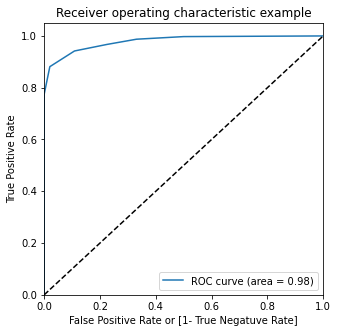

In [183]:
draw_roc(y_train_rus, y_train_pred_proba)

Prediction on the test set: 

In [184]:
y_test_pred = dt_bal_rus_model.predict(X_test)

In [185]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55046  1820]
 [   16    80]]


In [186]:
TP = confusion[1,1]  
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [187]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_test_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

Accuracy:  0.9677679856746603
Sensitivity:  0.8333333333333334
Specificity:  0.967994935462315


In [188]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56866
           1       0.04      0.83      0.08        96

    accuracy                           0.97     56962
   macro avg       0.52      0.90      0.53     56962
weighted avg       1.00      0.97      0.98     56962



In [189]:
y_test_pred_proba = dt_bal_rus_model.predict_proba(X_test)[:,1]

In [190]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9675513671027796

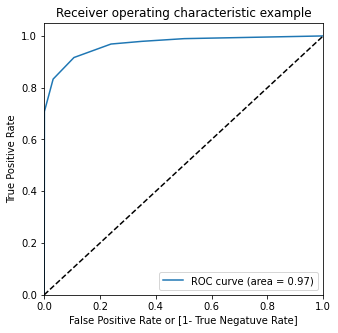

In [191]:
draw_roc(y_test, y_test_pred_proba)

RANDOM FOREST: 

In [192]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

grid_search.fit(X_train_rus, y_train_rus)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [193]:
print('We can get roc-auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get roc-auc of 0.9756785021936536 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


In [194]:
rfc_bal_rus_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=200)

In [195]:
rfc_bal_rus_model.fit(X_train_rus, y_train_rus)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=200)

Prediction on the train set: 

In [196]:
y_train_pred = rfc_bal_rus_model.predict(X_train_rus)

In [197]:
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[390   6]
 [ 43 353]]


In [198]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1]
FN = confusion[1,0]

In [199]:
print("Accuracy: ",metrics.accuracy_score(y_train_rus, y_train_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

print("F1-Score: ", f1_score(y_train_rus, y_train_pred))

Accuracy:  0.9381313131313131
Sensitivity:  0.8914141414141414
Specificity:  0.9848484848484849
F1-Score:  0.9350993377483444


In [200]:
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       396
           1       0.98      0.89      0.94       396

    accuracy                           0.94       792
   macro avg       0.94      0.94      0.94       792
weighted avg       0.94      0.94      0.94       792



In [201]:
y_train_pred_proba = rfc_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [202]:
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.98504616875829

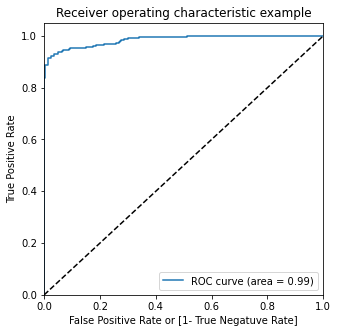

In [203]:
draw_roc(y_train_rus, y_train_pred_proba)

Prediction on the test set: 

In [204]:
y_test_pred = rfc_bal_rus_model.predict(X_test)

In [205]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55756  1110]
 [   16    80]]


In [206]:
TP = confusion[1,1]
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [207]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_test_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

Accuracy:  0.9802324356588603
Sensitivity:  0.8333333333333334
Specificity:  0.9804804276720712


In [208]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.83      0.12        96

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [209]:
y_test_pred_proba = rfc_bal_rus_model.predict_proba(X_test)[:,1]

In [210]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9748800909154854

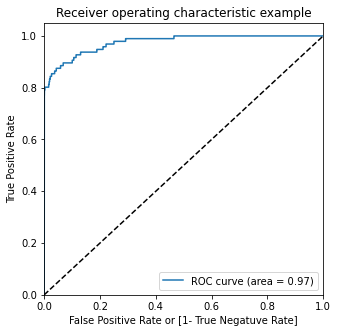

In [211]:
draw_roc(y_test, y_test_pred_proba)

OVERSAMPLING:

In [212]:
from imblearn.over_sampling import RandomOverSampler

In [213]:
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)

In [214]:
print('Before sampling class distribution:-',Counter(y_train))

print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227449})


Logistic Regression: 

In [215]:
folds = KFold(n_splits=5, shuffle=True, random_state=4)

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [216]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.649830,0.098116,0.028276,0.000511,0.01,{'C': 0.01},0.988695,0.988377,0.988560,0.988203,0.988793,0.988526,0.000213,6,0.988541,0.988550,0.988507,0.988652,0.988443,0.988539,0.000068
1,1.848027,0.051862,0.034792,0.009724,0.1,{'C': 0.1},0.988700,0.988402,0.988574,0.988193,0.988807,0.988535,0.000218,1,0.988556,0.988561,0.988515,0.988661,0.988451,0.988549,0.000068
2,1.791416,0.067630,0.029176,0.001965,1,{'C': 1},0.988700,0.988404,0.988575,0.988191,0.988805,0.988535,0.000218,2,0.988557,0.988562,0.988515,0.988659,0.988451,0.988549,0.000068
3,1.780828,0.114636,0.030884,0.003177,10,{'C': 10},0.988700,0.988404,0.988574,0.988191,0.988805,0.988535,0.000218,3,0.988557,0.988562,0.988515,0.988659,0.988451,0.988549,0.000068
4,1.830867,0.053338,0.029077,0.002536,100,{'C': 100},0.988700,0.988403,0.988574,0.988191,0.988806,0.988535,0.000218,4,0.988557,0.988562,0.988515,0.988659,0.988451,0.988549,0.000068
5,1.782036,0.043549,0.027775,0.001168,1000,{'C': 1000},0.988700,0.988403,0.988574,0.988191,0.988806,0.988535,0.000218,5,0.988557,0.988562,0.988515,0.988659,0.988451,0.988549,0.000068


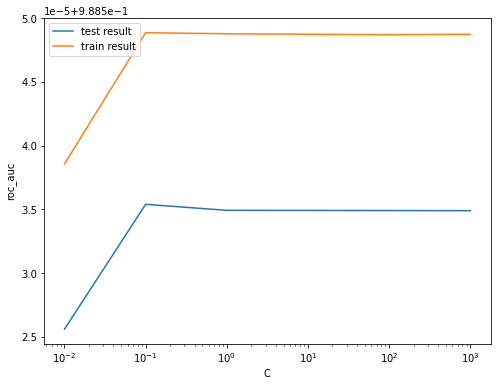

In [217]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [218]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9885353983994177 at C = 0.1


Logistic regression with optimal C

In [219]:
logistic_bal_ros = LogisticRegression(C=0.1)

In [220]:
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, y_train_ros)

Prediction on the train set

In [221]:
y_train_pred = logistic_bal_ros_model.predict(X_train_ros)

In [222]:
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[222253   5196]
 [ 17778 209671]]


In [223]:
TP = confusion[1,1]  
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [224]:
print("Accuracy: ",metrics.accuracy_score(y_train_ros, y_train_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

print("F1-Score: ", f1_score(y_train_ros, y_train_pred))

Accuracy:  0.9494963706149511
Sensitivity:  0.9218374228948027
Specificity:  0.9771553183350993
F1-Score:  0.9480597581819333


In [225]:
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [226]:
y_train_pred_proba = logistic_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [227]:
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9885450259654035

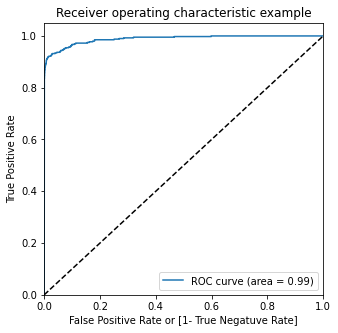

In [228]:
draw_roc(y_train_ros, y_train_pred_proba)

Prediction on the test set

In [229]:
y_test_pred = logistic_bal_ros_model.predict(X_test)

In [230]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55529  1337]
 [   11    85]]


In [231]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1]
FN = confusion[1,0]

In [232]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_test_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

Accuracy:  0.976335100593378
Sensitivity:  0.8854166666666666
Specificity:  0.9764885872050083


In [233]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [234]:
y_test_pred_proba = logistic_bal_ros_model.predict_proba(X_test)[:,1]

In [235]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9717010164245772

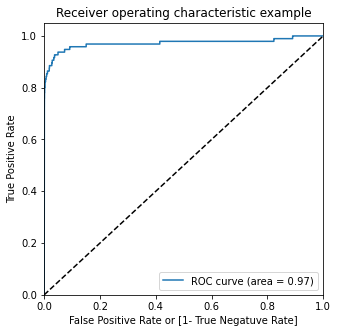

In [236]:
draw_roc(y_test, y_test_pred_proba)

XGBoost:

In [237]:
folds = 3

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[19:44:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:44:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:44:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:45:16]

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [238]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,20.535307,0.329077,0.148395,0.012610,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999910,0.999926,0.999907,0.999914,0.000008,5,0.999924,0.999931,0.999930,0.999929,3.064341e-06
1,26.714162,1.548872,0.140374,0.004094,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999908,0.999926,0.999912,0.999915,0.000007,4,0.999920,0.999931,0.999930,0.999927,4.868513e-06
2,31.048527,0.556745,0.147015,0.014865,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999897,0.999919,0.999908,0.999908,0.000009,6,0.999908,0.999925,0.999931,0.999921,9.517272e-06
3,21.478312,0.256481,0.138870,0.002684,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999991,0.999975,0.999971,0.999979,0.000009,3,0.999997,0.999996,1.000000,0.999998,1.582651e-06
4,27.486857,0.590850,0.149397,0.006433,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999996,0.999989,0.999973,0.999986,0.000010,1,0.999999,0.999997,1.000000,0.999999,1.289905e-06
5,31.969000,1.921734,0.141877,0.004154,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999999,0.999984,0.999973,0.999986,0.000011,2,0.999999,0.999998,0.999998,0.999999,4.059506e-07


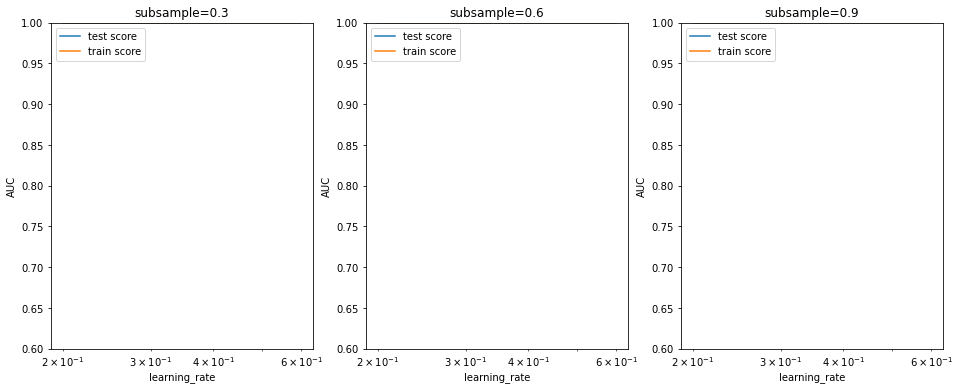

In [239]:
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):

    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [240]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [241]:
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

[19:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:53:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Prediction on the train set

In [242]:
y_train_pred = xgb_bal_ros_model.predict(X_train_ros)

In [243]:
confusion = metrics.confusion_matrix(y_train_ros, y_train_ros)
print(confusion)

[[227449      0]
 [     0 227449]]


In [244]:
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1]
FN = confusion[1,0]

In [245]:
print("Accuracy: ",metrics.accuracy_score(y_train_ros, y_train_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

Accuracy:  1.0
Sensitivity:  1.0
Specificity:  1.0


In [246]:
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [247]:
y_train_pred_proba = xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [248]:
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

1.0

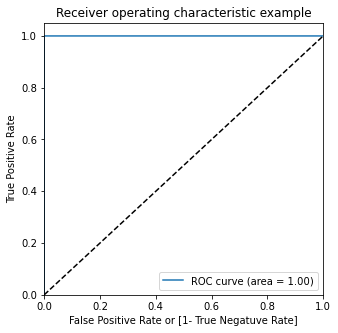

In [249]:
draw_roc(y_train_ros, y_train_pred_proba)

Prediction on the test set

In [250]:
y_test_pred = xgb_bal_ros_model.predict(X_test)

In [251]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56858     8]
 [   20    76]]


In [252]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1] 
FN = confusion[1,0]

In [253]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_test_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

Accuracy:  0.9995084442259752
Sensitivity:  0.7916666666666666
Specificity:  0.9998593183976365


In [254]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.79      0.84        96

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [255]:
y_test_pred_proba = xgb_bal_ros_model.predict_proba(X_test)[:,1]

In [256]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9694840905227494

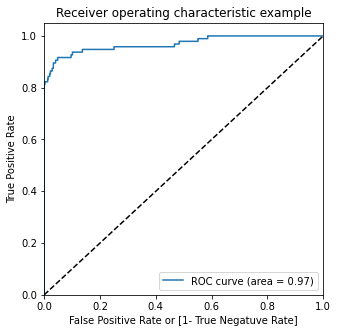

In [257]:
draw_roc(y_test, y_test_pred_proba)

Decision Tree:

In [258]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

grid_search.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [259]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.117465,0.064143,0.057994,0.004033,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.983717,0.990728,0.984774,0.986406,0.003086,6
1,4.183949,0.021050,0.070020,0.009083,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.983717,0.990728,0.984788,0.986411,0.003083,5
2,4.133037,0.095970,0.069017,0.005795,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.983702,0.990648,0.984694,0.986348,0.003067,7
3,4.005185,0.026799,0.056486,0.000233,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.983700,0.990637,0.984694,0.986344,0.003063,8
4,6.951455,0.337865,0.079048,0.019881,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999527,0.999673,0.999563,0.999588,0.000062,3
5,6.920784,0.482989,0.057649,0.000410,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999549,0.999661,0.999561,0.999590,0.000050,2
6,5.956249,0.268193,0.061691,0.005302,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999544,0.999651,0.999550,0.999582,0.000049,4
7,5.898363,0.054289,0.058179,0.001062,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999538,0.999664,0.999572,0.999591,0.000053,1


In [260]:
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9995908806482717
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


In [261]:
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

Prediction on the train set

In [262]:
y_train_pred = dt_bal_ros_model.predict(X_train_ros)

In [263]:
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[225833   1616]
 [     0 227449]]


In [264]:
TP = confusion[1,1]
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [265]:
print("Accuracy: ",metrics.accuracy_score(y_train_ros, y_train_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

Accuracy:  0.9964475552761278
Sensitivity:  1.0
Specificity:  0.9928951105522557


In [266]:
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227449
           1       0.99      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [267]:
y_train_pred_proba = dt_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [268]:
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9997659841230818

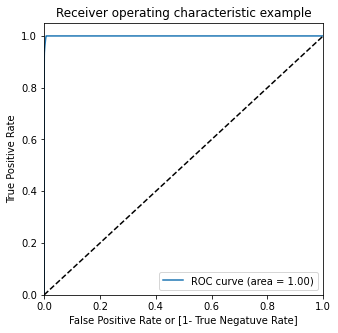

In [269]:
draw_roc(y_train_ros, y_train_pred_proba)

Prediction on the test set

In [270]:
y_test_pred = dt_bal_ros_model.predict(X_test)

In [271]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56434   432]
 [   21    75]]


In [272]:
TP = confusion[1,1] 
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [273]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_test_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

Accuracy:  0.9920473297988133
Sensitivity:  0.78125
Specificity:  0.9924031934723736


In [274]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.15      0.78      0.25        96

    accuracy                           0.99     56962
   macro avg       0.57      0.89      0.62     56962
weighted avg       1.00      0.99      0.99     56962



In [275]:
y_test_pred_proba = dt_bal_ros_model.predict_proba(X_test)[:,1]

In [276]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8896498456898673

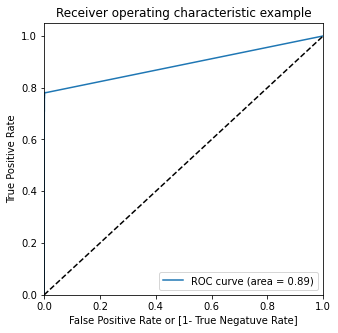

In [277]:
draw_roc(y_test, y_test_pred_proba)

MODEL SUMMARY: 
    -Train set:
        1.Accuracy = 0.99
        2.Sensitivity = 1.0
        3.Specificity = 0.99
        4.ROC-AUC = 0.99
    -Test set:
        1.Accuracy = 0.99
        2.Sensitivity = 0.79
        3.Specificity = 0.99
        4.ROC-AUC = 0.90

SMOTE (Synthetic Minority Oversampling Technique)
We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [278]:
from imblearn.over_sampling import SMOTE

In [280]:
sm = SMOTE(random_state=27)

X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [281]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (227845, 29)
After SMOTE oversampling X_train shape= (454898, 29)


Logistic Regression

In [282]:
folds = KFold(n_splits=5, shuffle=True, random_state=4)

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [283]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.665485,0.081655,0.036898,0.009774,0.01,{'C': 0.01},0.989805,0.989796,0.989484,0.989631,0.989910,0.989725,0.000150,6,0.989758,0.989666,0.989760,0.989841,0.989682,0.989741,0.000063
1,1.690406,0.092995,0.034692,0.007827,0.1,{'C': 0.1},0.989834,0.989807,0.989488,0.989632,0.989942,0.989741,0.000161,1,0.989780,0.989686,0.989772,0.989853,0.989700,0.989758,0.000060
2,1.764685,0.066842,0.031483,0.001467,1,{'C': 1},0.989836,0.989807,0.989486,0.989630,0.989944,0.989741,0.000162,2,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
3,1.722317,0.127432,0.035495,0.010388,10,{'C': 10},0.989836,0.989807,0.989486,0.989630,0.989945,0.989741,0.000163,5,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
4,1.775622,0.103182,0.030880,0.000922,100,{'C': 100},0.989836,0.989807,0.989486,0.989630,0.989945,0.989741,0.000163,3,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
5,1.744336,0.055627,0.039706,0.010281,1000,{'C': 1000},0.989836,0.989807,0.989486,0.989630,0.989945,0.989741,0.000163,4,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060


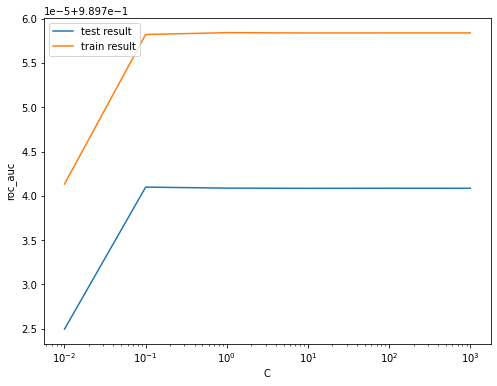

In [284]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [285]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9897409900830768 at C = 0.1


Logistic regression with optimal C

In [286]:
logistic_bal_smote = LogisticRegression(C=0.1)

In [287]:
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

Prediction on the train set

In [288]:
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

In [289]:
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[221911   5538]
 [ 17693 209756]]


In [290]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1]
FN = confusion[1,0]

In [291]:
print("Accuracy: ",metrics.accuracy_score(y_train_smote, y_train_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

Accuracy:  0.9489314087993352
Sensitivity:  0.9222111330452102
Specificity:  0.9756516845534603


In [292]:
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.97      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [293]:
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

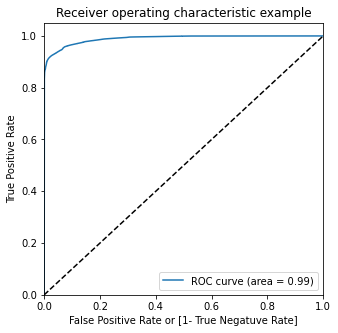

In [294]:
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

Prediction on the test set

In [295]:
y_test_pred = logistic_bal_smote_model.predict(X_test)

In [296]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55416  1450]
 [   10    86]]


In [297]:
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1]
FN = confusion[1,0] 

In [298]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_test_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

Accuracy:  0.9743688774972789
Sensitivity:  0.8958333333333334
Specificity:  0.9745014595716245


In [299]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.06      0.90      0.11        96

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



ROC on the test set

In [300]:
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

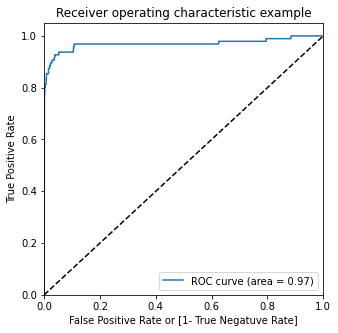

In [301]:
draw_roc(y_test, y_test_pred_proba)

XGBoost: 

In [302]:
folds = 3

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[20:24:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:24:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:25:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:25:32]

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [303]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,25.904591,0.324585,0.147225,0.004883,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999645,0.999753,0.999685,0.999694,0.000045,4,0.999718,0.999736,0.999720,0.999725,0.000008
1,37.116247,1.256062,0.147893,0.006057,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999671,0.999738,0.999652,0.999687,0.000037,5,0.999733,0.999731,0.999697,0.999721,0.000017
2,45.235848,0.464288,0.143214,0.006158,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999665,0.999735,0.999648,0.999683,0.000038,6,0.999720,0.999723,0.999720,0.999721,0.000001
3,26.711646,0.415856,0.142713,0.006131,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999956,0.999950,0.999953,0.999953,0.000002,3,0.999979,0.999972,0.999977,0.999976,0.000003
4,37.173000,0.082071,0.146890,0.002836,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999953,0.999962,0.999959,0.999958,0.000004,2,0.999980,0.999981,0.999984,0.999982,0.000002
5,44.968945,0.328067,0.147893,0.001475,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999970,0.999958,0.999951,0.999960,0.000008,1,0.999985,0.999981,0.999977,0.999981,0.000003


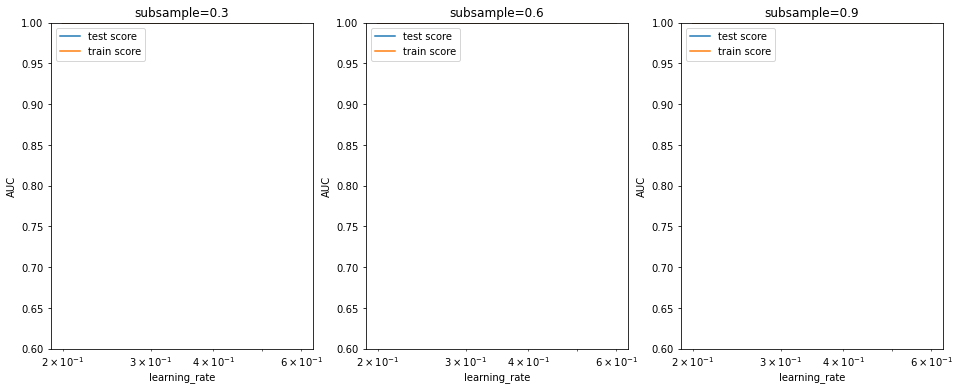

In [304]:
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):

    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [305]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [306]:
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

[20:36:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Prediction on the train set

In [307]:
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [308]:
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[227447      2]
 [     0 227449]]


In [309]:
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [310]:
print("Accuracy: ",metrics.accuracy_score(y_train_smote, y_train_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

Accuracy:  0.9999956034099952
Sensitivity:  1.0
Specificity:  0.9999912068199904


In [311]:
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [312]:
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [313]:
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

1.0

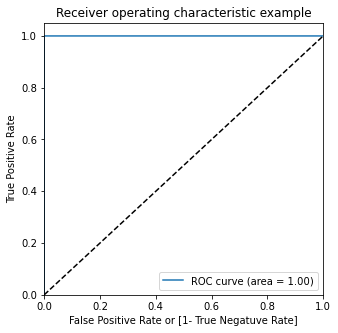

In [314]:
draw_roc(y_train_smote, y_train_pred_proba)

Prediction on the test set

In [315]:
y_test_pred = xgb_bal_smote_model.predict(X_test)

In [316]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56839    27]
 [   20    76]]


In [317]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [318]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_test_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

Accuracy:  0.9991748885221726
Sensitivity:  0.7916666666666666
Specificity:  0.9995251995920234


In [319]:
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

In [320]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9618437789423088

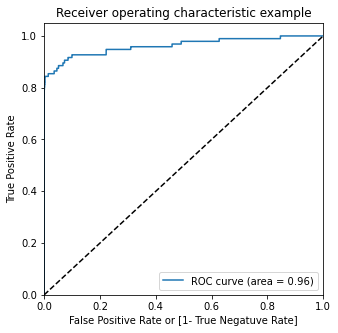

In [321]:
draw_roc(y_test, y_test_pred_proba)

Overall, the model is performing well in the test set, what it had learnt from the train set.

Decision Tree

In [322]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [323]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.905153,0.079999,0.060662,0.002166,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.986127,0.985690,0.984838,0.985552,0.000535,5
1,6.794640,0.012170,0.057775,0.001506,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.986116,0.985688,0.984837,0.985547,0.000531,6
2,6.991535,0.228898,0.057815,0.001266,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.986062,0.985639,0.984773,0.985491,0.000537,7
3,6.809774,0.140648,0.064429,0.001333,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.986057,0.985639,0.984765,0.985487,0.000538,8
4,12.549764,0.079118,0.069852,0.005184,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998152,0.998138,0.998002,0.998098,0.000068,1
5,12.545834,0.071462,0.068721,0.003729,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998165,0.998123,0.997950,0.998080,0.000093,2
6,12.474778,0.101818,0.066641,0.006547,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998070,0.998105,0.997916,0.998030,0.000082,3
7,12.639417,0.059314,0.071617,0.004989,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998070,0.998071,0.997913,0.998018,0.000075,4


In [324]:
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9980976768769975
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [325]:
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

Prediction on the train set

In [326]:
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

In [327]:
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[223809   3640]
 [  2374 225075]]


In [328]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [329]:
print("Accuracy: ",metrics.accuracy_score(y_train_smote, y_train_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

Accuracy:  0.9867794538555896
Sensitivity:  0.9895624953286232
Specificity:  0.9839964123825561


In [330]:
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    227449
           1       0.98      0.99      0.99    227449

    accuracy                           0.99    454898
   macro avg       0.99      0.99      0.99    454898
weighted avg       0.99      0.99      0.99    454898



In [331]:
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [332]:
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9986355757920081

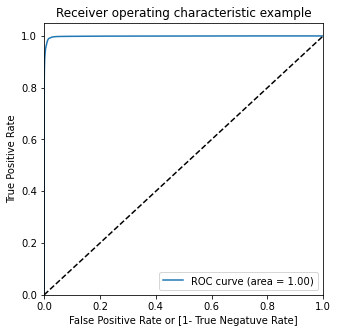

In [333]:
draw_roc(y_train_smote, y_train_pred_proba)

Prediction on the test set

In [334]:
y_test_pred = dt_bal_smote_model.predict(X_test)

In [335]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55852  1014]
 [   19    77]]


In [336]:
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1]
FN = confusion[1,0]

In [337]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_test_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

Accuracy:  0.9818651030511569
Sensitivity:  0.8020833333333334
Specificity:  0.9821686069004326


In [338]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.80      0.13        96

    accuracy                           0.98     56962
   macro avg       0.54      0.89      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [339]:
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

In [340]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8551876157692353

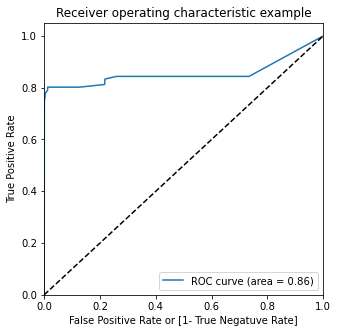

In [341]:
draw_roc(y_test, y_test_pred_proba)

AdaSyn (Adaptive Synthetic Sampling)

In [342]:
from imblearn.over_sampling import ADASYN

In [343]:
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [344]:
print('Before sampling class distribution:-',Counter(y_train))

print('New class distribution:-',Counter(y_train_adasyn))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227448})


Logistic Regression

In [345]:
folds = KFold(n_splits=3, shuffle=True, random_state=4)

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [346]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.361611,0.095308,0.053811,0.001704,0.01,{'C': 0.01},0.963472,0.962327,0.963273,0.963024,0.000499,6,0.962770,0.963211,0.963172,0.963051,0.000199
1,1.495774,0.115459,0.055489,0.003302,0.1,{'C': 0.1},0.963578,0.962435,0.963370,0.963128,0.000497,5,0.962881,0.963305,0.963272,0.963153,0.000192
2,1.430134,0.046903,0.067855,0.020792,1,{'C': 1},0.963585,0.962442,0.963376,0.963134,0.000497,4,0.962890,0.963312,0.963278,0.963160,0.000191
3,1.615803,0.061122,0.060160,0.004254,10,{'C': 10},0.963585,0.962443,0.963377,0.963135,0.000496,3,0.962891,0.963312,0.963279,0.963161,0.000191
4,1.565828,0.073814,0.057820,0.003309,100,{'C': 100},0.963585,0.962443,0.963377,0.963135,0.000496,2,0.962891,0.963312,0.963279,0.963161,0.000191
5,1.587443,0.084383,0.068518,0.013340,1000,{'C': 1000},0.963585,0.962443,0.963377,0.963135,0.000496,1,0.962891,0.963312,0.963279,0.963161,0.000191


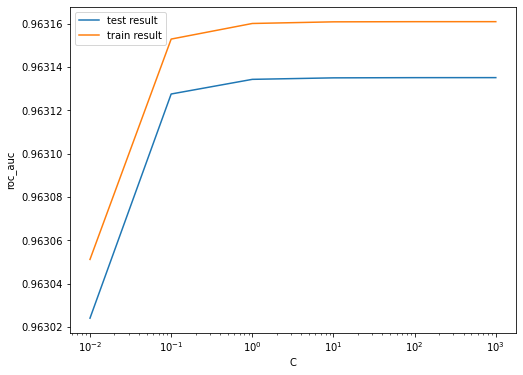

In [347]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [348]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.963135148223901 at C = 1000


Logistic regression with optimal C

In [349]:
logistic_bal_adasyn = LogisticRegression(C=1000)

In [350]:
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

Prediction on the train set

In [351]:
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

In [352]:
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[207019  20430]
 [ 31286 196162]]


In [353]:
TP = confusion[1,1]
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [354]:
print("Accuracy: ",metrics.accuracy_score(y_train_adasyn, y_train_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

print("F1-Score: ", f1_score(y_train_adasyn, y_train_pred))

Accuracy:  0.8863127257379143
Sensitivity:  0.862447680348915
Specificity:  0.9101776662020936
F1-Score:  0.8835330150436899


In [355]:
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89    227449
           1       0.91      0.86      0.88    227448

    accuracy                           0.89    454897
   macro avg       0.89      0.89      0.89    454897
weighted avg       0.89      0.89      0.89    454897



In [356]:
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [357]:
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9631610160068507

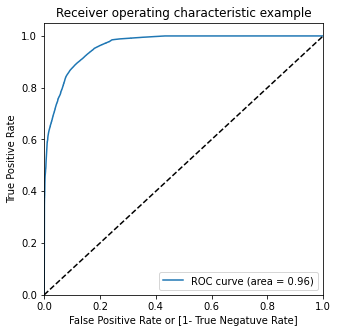

In [358]:
draw_roc(y_train_adasyn, y_train_pred_proba)

Prediction on the test set

In [359]:
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

In [360]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[51642  5224]
 [    4    92]]


In [361]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [362]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_test_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

Accuracy:  0.9082195147642288
Sensitivity:  0.9583333333333334
Specificity:  0.9081349136566665


In [363]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56866
           1       0.02      0.96      0.03        96

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962



In [364]:
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

In [365]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9671573487086602

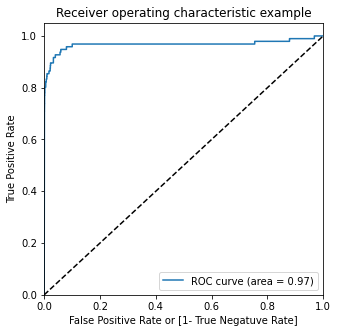

In [366]:
draw_roc(y_test, y_test_pred_proba)

DECISION TREE: 

In [367]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [368]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.179650,0.076481,0.059160,0.003751,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.902958,0.920355,0.909332,0.910882,0.007186,8
1,6.473205,0.470978,0.065169,0.003567,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.902958,0.920355,0.909332,0.910882,0.007186,7
2,6.784709,0.356350,0.062165,0.007895,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.902958,0.920317,0.913511,0.912262,0.007141,6
3,6.596863,0.195047,0.067847,0.004201,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.902958,0.920310,0.914013,0.912427,0.007172,5
4,11.558754,0.156958,0.057820,0.001251,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.935357,0.945369,0.936696,0.939141,0.004438,3
5,10.825738,0.533720,0.058486,0.001702,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.933908,0.947047,0.934596,0.938517,0.006038,4
6,11.695746,1.095086,0.056149,0.000819,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.934758,0.944833,0.942906,0.940833,0.004367,1
7,11.568742,1.103618,0.071523,0.021037,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.936423,0.945445,0.939200,0.940356,0.003773,2


In [369]:
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9408325246151054
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [370]:
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

Prediction on the train set

In [371]:
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

In [372]:
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[215929  11520]
 [  1118 226330]]


In [373]:
TP = confusion[1,1]
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [374]:
print("Accuracy: ",metrics.accuracy_score(y_train_adasyn, y_train_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

Accuracy:  0.9722178866864367
Sensitivity:  0.9950845907636031
Specificity:  0.9493512831447929


In [375]:
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    227449
           1       0.95      1.00      0.97    227448

    accuracy                           0.97    454897
   macro avg       0.97      0.97      0.97    454897
weighted avg       0.97      0.97      0.97    454897



In [376]:
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [377]:
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9917591040224101

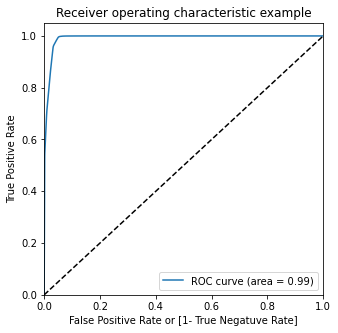

In [378]:
draw_roc(y_train_adasyn, y_train_pred_proba)

Prediction on the test set

In [379]:
y_test_pred = dt_bal_adasyn_model.predict(X_test)

In [380]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[53880  2986]
 [   15    81]]


In [381]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1]
FN = confusion[1,0]

In [382]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_test_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

Accuracy:  0.9473157543625575
Sensitivity:  0.84375
Specificity:  0.9474905919178419


In [383]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56866
           1       0.03      0.84      0.05        96

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.95      0.97     56962



In [384]:
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

In [385]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9141440147305362

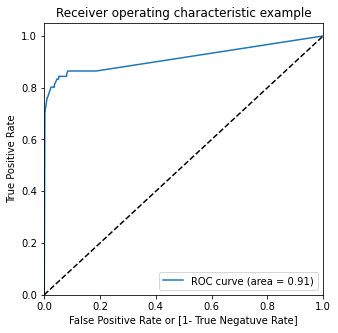

In [386]:
draw_roc(y_test, y_test_pred_proba)

In [387]:
folds = 3

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[22:59:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:00:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:00:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:20]

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [388]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,26.852950,0.396058,0.154410,0.001476,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.975756,0.996202,0.994729,0.988896,0.009310,5,0.999304,0.999014,0.999315,0.999211,0.000139
1,38.973080,0.430475,0.145721,0.005808,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.978500,0.996075,0.993204,0.989260,0.007698,3,0.999295,0.999072,0.999224,0.999197,0.000093
2,48.225963,0.456447,0.147726,0.005451,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.977110,0.996104,0.993729,0.988981,0.008450,4,0.999300,0.999069,0.999194,0.999188,0.000095
3,28.431129,0.355295,0.162598,0.011767,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.979173,0.998146,0.998145,0.991822,0.008944,1,0.999937,0.999934,0.999942,0.999938,0.000004
4,40.098829,0.242094,0.152405,0.004721,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.971621,0.996825,0.997548,0.988664,0.012055,6,0.999950,0.999942,0.999947,0.999946,0.000003
5,49.362673,1.007304,0.160093,0.003715,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.977355,0.998183,0.995571,0.990370,0.009265,2,0.999953,0.999935,0.999955,0.999948,0.000009


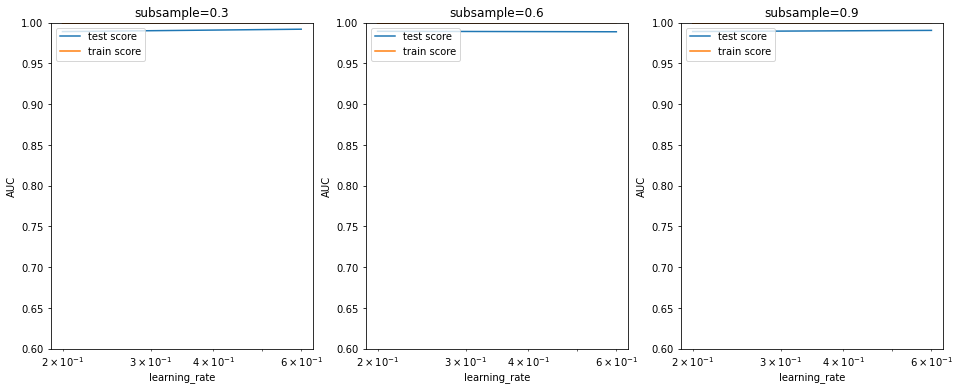

In [389]:
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):

    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [390]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.3}

In [391]:
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

[23:15:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:15:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Prediction on the train set

In [392]:
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

In [393]:
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn)
print(confusion)

[[227449      0]
 [     0 227448]]


In [394]:
TP = confusion[1,1]
TN = confusion[0,0] 
FP = confusion[0,1]
FN = confusion[1,0]

In [395]:
print("Accuracy: ",metrics.accuracy_score(y_train_adasyn, y_train_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

Accuracy:  0.9999956034003302
Sensitivity:  1.0
Specificity:  1.0


In [396]:
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227448

    accuracy                           1.00    454897
   macro avg       1.00      1.00      1.00    454897
weighted avg       1.00      1.00      1.00    454897



In [397]:
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [398]:
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

1.0

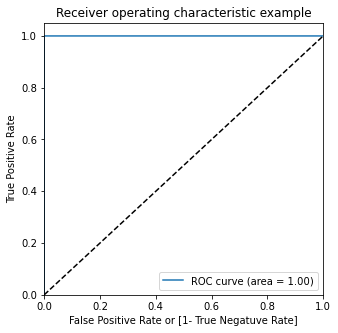

In [399]:
draw_roc(y_train_adasyn, y_train_pred_proba)

Prediction on the test set

In [400]:
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

In [401]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56825    41]
 [   21    75]]


In [402]:
TP = confusion[1,1] 
TN = confusion[0,0]
FP = confusion[0,1] 
FN = confusion[1,0]

In [403]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_test_pred))

print("Sensitivity: ",TP / float(TP+FN))

print("Specificity: ", TN / float(TN+FP))

Accuracy:  0.9989115550718023
Sensitivity:  0.78125
Specificity:  0.9992790067878873


In [404]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.78      0.71        96

    accuracy                           1.00     56962
   macro avg       0.82      0.89      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [405]:
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

In [406]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9599176499724499

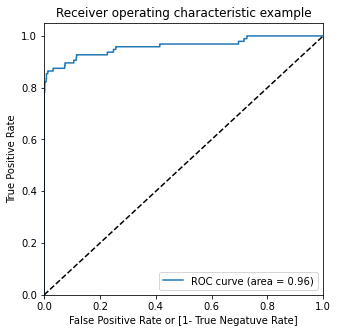

In [407]:
draw_roc(y_test, y_test_pred_proba)

Choosing best model on the balanced data
He we balanced the data with various approach such as Undersampling, Oversampling, SMOTE and Adasy. With every data balancing thechnique we built several models such as Logistic, XGBoost, Decision Tree, and Random Forest.

We can see that almost all the models performed more or less good. But we should be interested in the best model.

Though the Undersampling technique models performed well, we should keep mind that by doing the undersampling some imformation were lost. Hence, it is better not to consider the undersampling models.

Whereas the SMOTE and Adasyn models performed well. Among those models the simplist model Logistic regression has ROC score 0.99 in the train set and 0.97 on the test set. We can consider the Logistic model as the best model to choose because of the easy interpretation of the models and also the resourse requirements to build the mdoel is lesser than the other heavy models such as Random forest or XGBoost.

Hence, we can conclude that the Logistic regression model with SMOTE is the best model for its simlicity and less resource requirement.

Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [408]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9897539730582245
Threshold= 0.5311563616125231


We can see that the threshold is 0.53, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

Cost benefit analysis
We have tried several models till now with both balanced and imbalanced data. We have noticed most of the models have performed more or less well in terms of ROC score, Precision and Recall.

But while picking the best model we should consider few things such as whether we have required infrastructure, resources or computational power to run the model or not. For the models such as Random forest, SVM, XGBoost we require heavy computational resources and eventually to build that infrastructure the cost of deploying the model increases. On the other hand the simpler model such as Logistic regression requires less computational resources, so the cost of building the model is less.

We also have to consider that for little change of the ROC score how much monetary loss of gain the bank incur. If the amount if huge then we have to consider building the complex model even though the cost of building the model is high.

Summary to the business
For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, we can add the human element to verify whether the transaction was done by calling the customer. However, when precision is low, such tasks are a burden because the human element has to be increased.

For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So we have to consider the losses if the missed transaction was a high-value fraudulent one.

So here, to save the banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions.

After performing several models, we have seen that in the balanced dataset with SMOTE technique the simplest Logistic regression model has good ROC score and also high Recall. Hence, we can go with the logistic model here. It is also easier to interpret and explain to the business.